In [2]:
import sys
import numpy as  np
from dataclasses import dataclass

@dataclass
class padainput:
    inputfile : str = "dipole.txt"
    outfile : str = "ftoutput.txt"
    limit : int = 10000
    frequency : float = 10.0
    fmin : float = 0.0
    f0 : str = "10;0;0"
    damping : str = "exp"
    gamma : np.float64 = 1.0e-3
    pad : int = 0
    rstep : int = 1
    resampling : bool = False
    diagn : bool = False
    pulseFmax : np.float64 = 1.0
    dw : float = 0.03, 
    preproc : bool = True 

wfilenamex = "./omp.mklparallel.quad.x/weighted_dip.txt"
wfilenamey = "./omp.mklparallel.quad.y/weighted_dip.txt"
wfilenamez = "./omp.mklparallel.quad.z/weighted_dip.txt"

dipolexfilename =  "./omp.mklparallel.quad.x/dipole.txt"
dipoleyfilename =  "./omp.mklparallel.quad.y/dipole.txt"
dipolezfilename =  "./omp.mklparallel.quad.z/dipole.txt"
PADEDIR = "/home/redo/BERTHA/Exanalysis/misc/pade/"

inputvals = padainput()
inputvals.gamma = 2.0e-6
inputvals.dw = 0.02
inputvals.damping = "gauss"
inputvals.fmin = 2.5
inputvals.frequency = 6.5 
inputvals.limit = 25000

sys.path.append(PADEDIR)
import pade_transform

inputvals.inputfile = dipolexfilename
inputvals.outfile = "alongx.tzt"
pade_transform.run_pade(inputvals)

inputvals.inputfile = dipoleyfilename
inputvals.outfile = "alongy.tzt"
pade_transform.run_pade(inputvals)

inputvals.inputfile = dipolezfilename
inputvals.outfile = "alongz.tzt"
pade_transform.run_pade(inputvals)

dt: 0.08000000
limit : 25000, minfreq : 0.0919,frequency : 0.2389, gamma 2.000e-06, damping : gauss, nbins: 200             Fmax: 1.00000000,preproc_zero: True, inputfile: ./omp.mklparallel.quad.x/dipole.txt, outfile: alongx.tzt

Sampling points: 25000

n : 12500
number of sampling point : 25000
b dim: 12501
200
Dipole strength funcion values for selected freqs

3.674930360070e-01 2.142538694008e-07

0.000000000000e+00 0.000000000000e+00

0.000000000000e+00 0.000000000000e+00

dt: 0.08000000
limit : 25000, minfreq : 0.0919,frequency : 0.2389, gamma 2.000e-06, damping : gauss, nbins: 200             Fmax: 1.00000000,preproc_zero: True, inputfile: ./omp.mklparallel.quad.y/dipole.txt, outfile: alongy.tzt

Sampling points: 25000

n : 12500
number of sampling point : 25000
b dim: 12501
200
Dipole strength funcion values for selected freqs

3.674930360070e-01 1.397058695155e-07

0.000000000000e+00 0.000000000000e+00

0.000000000000e+00 0.000000000000e+00

dt: 0.08000000
limit : 25000, minfre

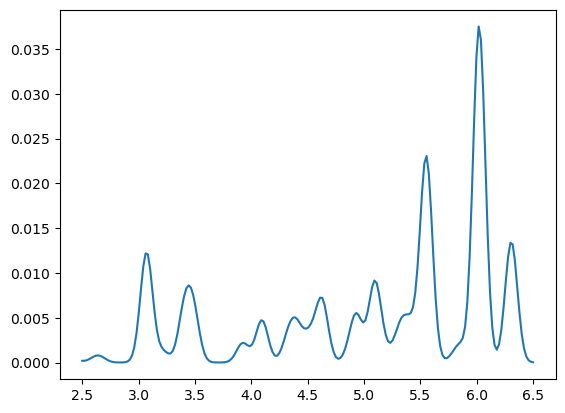

In [18]:
import matplotlib.pyplot as plt

values = {}
for fname in ["alongx.tzt",  "alongy.tzt", "alongz.tzt"]:
    fp = open(fname)
    values[fname] = []
    for l in fp:
        sl = l.split()
        values[fname].append(np.float64(sl))
    fp.close()
    npa = np.asarray(values[fname])
    values[fname] = npa
    
#print(values["alongx.tzt"])

x = []
y = []

for i, val in enumerate(values["alongx.tzt"]):
    x.append(val[0]*27.2114)
    y.append(val[0]*(val[2]+values["alongy.tzt"][i][2]+values["alongz.tzt"][i][2]))

plt.plot(x, y)